# Determining the offset between the observed center and the kinematic center of our galaxies

This notebook matches the spiral galaxies in our sample with galaxies in the MANGA sample with kinematic centers, so that we can see if there is a systematic offset in our placement of the center fiber.

In [1]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord, Distance
from astropy import units as u
from astropy.cosmology import Planck18 as cosmo
import os
from pathlib import Path

from astropy.table import Table, vstack, join, unique
from astropy.coordinates import SkyCoord, Distance
from astropy.cosmology import Planck18, LambdaCDM
from astropy.wcs import WCS
from astropy.visualization.wcsaxes import SphericalCircle
from astropy import units as u
from astropy import constants as c
import requests
import matplotlib as mpl
import matplotlib.image as mpimg
import math

In [2]:
#### Read in file with galaxy kinematic centers from Nitya
centers = Table.read('manga_kinematic_centers.fits')

##### Read in the file with out rotational velocities
gals = Table.read('SGA-2020_jura_Vrot_VI.fits')
# gals = Table.read('SGA-2020_jura_Vrot_VI_ML_photocorr.fits')

### Get the center coordinates from each of out samples, and perform a sky match between the objects.

In [3]:
## Center coords from the MANGA data
center_coords = SkyCoord(centers['objra'], centers['objdec'], unit='deg')

## center coordinates from SGA sample
gal_coords = SkyCoord(gals['RA'], gals['DEC'], unit='deg')

match_ids, match_dist, _ = center_coords.match_to_catalog_sky(gal_coords)

## Let's use these matches to add the group as a new column in our table
centers['RA_matched'] = gals['RA'][match_ids]
centers['DEC_matched']= gals['DEC'][match_ids]

#### now let's get the relative separation which is the separation divided by R26
centers['rel_sep'] = (2 * match_dist.to('arcmin')) / (gals['D26'][match_ids]*u.arcmin)

In [4]:
centers[:5]

plateifu,objra,objdec,kin_center_ra,kin_center_dec,RA_matched,DEC_matched,rel_sep
,,,,,,,
bytes32,float64,float64,float64,float64,float64,float64,float64
10001-12701,133.371090612,57.5984251446,133.37136806524703,57.59884166593068,134.09733721776388,57.301339548059005,84.84654033972211
10001-12702,133.685669869,57.4802503218,133.68566993942432,57.48011111099636,134.09733721776388,57.301339548059005,49.263806453234864
10001-12703,136.017159969,57.0923291779,136.0171599858419,57.09232900000001,134.09733721776388,57.301339548059005,183.3687168447665
10001-12704,133.989966869,57.6779676669,133.9899685430747,57.677829111002396,134.09733721776388,57.301339548059005,65.86152113535259
10001-12705,136.75137451,57.4514369241,136.7513720835557,57.45129811100007,137.7136026125566,57.72460922169214,114.9746254598268


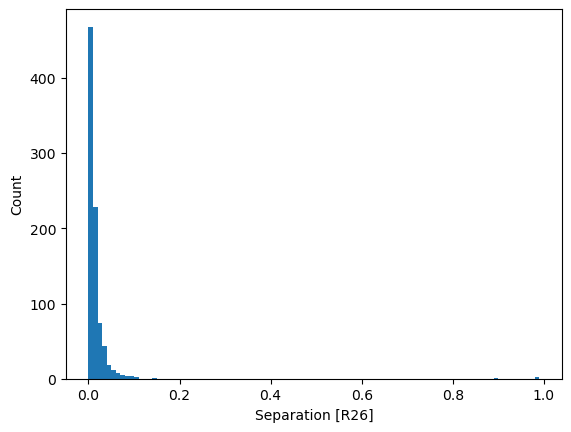

In [5]:
## plot a histogram of the separations that could possibly be matches
plt.figure()
plt.hist(centers['rel_sep'], bins=np.arange(0,1,0.01))
plt.xlabel('Separation [R26]')
plt.ylabel('Count')
# plt.yscale('log')
plt.show()

Based on the histogram and past VI, we have determined that 0.1R26 is a reasonable cut to make for actual galaxy matches.

In [6]:
close_matches = centers[centers['rel_sep'] <= 0.1]

In [7]:
close_matches[:5]

plateifu,objra,objdec,kin_center_ra,kin_center_dec,RA_matched,DEC_matched,rel_sep
,,,,,,,
bytes32,float64,float64,float64,float64,float64,float64,float64
10213-12702,124.272776248,43.3509915523,124.27264008762963,43.35085311084331,124.27268435330247,43.35103204129766,0.012129191087675047
10214-12701,121.177734666,35.4005287119,121.17759197339105,35.400667888878004,121.17767250822992,35.400601910135634,0.006666757842071807
10215-12702,121.466201503,37.5140925477,121.46633919981254,37.51409299987079,121.46622439654605,37.514043449418224,0.010880114094618686
10215-12703,122.130636583,37.5865756841,122.13091706924595,37.586714888479584,122.13064132023531,37.586493584043595,0.007940161228619546
10215-9101,121.561209049,37.6405216725,121.5612098020569,37.640522000000004,121.56109997638029,37.64046629109479,0.020058942579179583


### Now, let's find the distance between the kinematic center and the matched galaxy center

In [8]:
## Kinematic centers
center_coords = SkyCoord(centers['kin_center_ra'], centers['kin_center_dec'], unit='deg')

## fiber center coordinates
obs_coords = SkyCoord(centers['RA_matched'], centers['DEC_matched'], unit='deg')

match_ids, match_dist, _ = center_coords.match_to_catalog_sky(obs_coords)


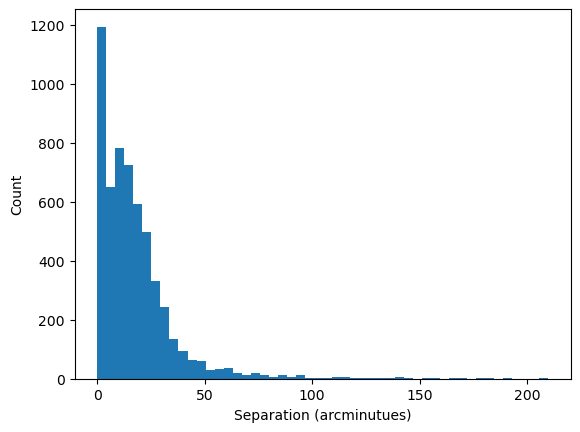

In [9]:
## plot a histogram of the separations
plt.figure()
plt.hist(match_dist.to('arcmin'), bins=50)
plt.xlabel('Separation (arcminutues)')
# plt.yscale('log')
plt.ylabel('Count')
# plt.yscale('log')
plt.show()

In [10]:
print(f'Median separation: {np.median(match_dist.to("arcmin"))}')
print(f'Mean separation: {np.mean(match_dist.to("arcmin"))}')

Median separation: 13.63633943592945 arcmin
Mean separation: 17.35512380054286 arcmin
